<h1> Balanced Dataset Extraction 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/output_bench/master_dataset.csv")

In [3]:
df['outcome_inhospital_mortality'].value_counts()

False    444079
True       4893
Name: outcome_inhospital_mortality, dtype: int64

Encodage des variables booléennes 

In [4]:
# Récupérer les colonnes de type 'bool'
bool_columns = df.select_dtypes(include=bool).columns.tolist()

# Afficher la liste des colonnes de type 'bool'
print(bool_columns)

['outcome_inhospital_mortality', 'outcome_icu_transfer_12h', 'outcome_hospitalization', 'outcome_critical', 'outcome_ed_revisit_3d', 'chiefcom_chest_pain', 'chiefcom_abdominal_pain', 'chiefcom_headache', 'chiefcom_shortness_of_breath', 'chiefcom_back_pain', 'chiefcom_cough', 'chiefcom_nausea_vomiting', 'chiefcom_fever_chills', 'chiefcom_syncope', 'chiefcom_dizziness']


In [5]:
#fonction pour encoder les variables catégorielles et/ou booléennes 
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, column_names):
    le = LabelEncoder()
    for column_name in column_names:
        df[column_name] = le.fit_transform(df[column_name])
    return df

In [6]:
df = label_encode_columns(df, bool_columns)

In [7]:
df['outcome_inhospital_mortality'].value_counts()

0    444079
1      4893
Name: outcome_inhospital_mortality, dtype: int64

In [8]:
#Récupération d'une base de données équilibrée 

# Compter le nombre de lignes avec outcome égal à 0 et outcome égal à 1 avant la sélection
count_0_before = df[df['outcome_inhospital_mortality'] == 0].shape[0]
count_1_before = df[df['outcome_inhospital_mortality'] == 1].shape[0]

if count_0_before > count_1_before:
    # Sélectionner un sous-ensemble aléatoire de lignes ayant outcome égal à 0
    subset_om = df[df['outcome_inhospital_mortality'] == 0].sample(n=count_1_before, random_state=42)
    subset_om = pd.concat([subset_om, df[df['outcome_inhospital_mortality'] == 1]])  # Ajouter les lignes avec outcome égal à 1
elif count_1_before > count_0_before:
    # Sélectionner un sous-ensemble aléatoire de lignes ayant outcome égal à 1
    subset_om = df[df['outcome_inhospital_mortality'] == 1].sample(n=count_0_before, random_state=42)
    subset_om = pd.concat([subset_om, df[df['outcome_inhospital_mortality'] == 0]])  # Ajouter les lignes avec outcome égal à 0
else:
    # Votre base de données répond déjà au critère
    subset_om = df

# Compter le nombre de lignes avec outcome égal à 0 et outcome égal à 1 après la sélection
count_0_after = subset_om[subset_om['outcome_inhospital_mortality'] == 0].shape[0]
count_1_after = subset_om[subset_om['outcome_inhospital_mortality'] == 1].shape[0]

print("Nombre de 0 avant la sélection:", count_0_before)
print("Nombre de 1 avant la sélection:", count_1_before)
print("Nombre de 0 après la sélection:", count_0_after)
print("Nombre de 1 après la sélection:", count_1_after)

Nombre de 0 avant la sélection: 444079
Nombre de 1 avant la sélection: 4893
Nombre de 0 après la sélection: 4893
Nombre de 1 après la sélection: 4893


In [9]:
subset_om.shape

(9786, 117)

<h1> Data Preprocessing

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
column_types_df = subset_om.dtypes.reset_index()
column_types_df.columns = ['Column', 'Type']

In [12]:
# Display the DataFrame
print(column_types_df)

                           Column     Type
0                           index    int64
1                      subject_id    int64
2                         hadm_id  float64
3                         stay_id    int64
4                          intime   object
5                         outtime   object
6                      anchor_age    int64
7                          gender   object
8                     anchor_year    int64
9                             dod   object
10                      admittime   object
11                      dischtime   object
12                      deathtime   object
13                      ethnicity   object
14                      edregtime   object
15                      edouttime   object
16                      insurance   object
17                        in_year    int64
18                            age    int64
19   outcome_inhospital_mortality    int64
20                         ed_los   object
21                     intime_icu   object
22         

In [13]:
def missing_value_percentage(df):
    total_missing = df.isnull().sum()
    percent_missing = (total_missing / len(df)) * 100
    missing_df = pd.DataFrame({'Total Missing': total_missing, 'Percentage Missing': percent_missing})
    return missing_df

In [14]:
missing_values = missing_value_percentage(subset_om)
print(missing_values)

                              Total Missing  Percentage Missing
index                                     0            0.000000
subject_id                                0            0.000000
hadm_id                                2561           26.170039
stay_id                                   0            0.000000
intime                                    0            0.000000
outtime                                   0            0.000000
anchor_age                                0            0.000000
gender                                    0            0.000000
anchor_year                               0            0.000000
dod                                    4767           48.712446
admittime                              2561           26.170039
dischtime                              2561           26.170039
deathtime                              4916           50.235030
ethnicity                              1572           16.063765
edregtime                              2

Data Cleaning 

In [15]:
#Elimination des attributs qui ont plus que 50% de valeurs manquantes
columns_to_drop = ['hadm_id', 'deathtime', 'intime_icu', 'time_to_icu_transfer', 'next_ed_visit_time', 'next_ed_visit_time_diff', 'time_to_icu_transfer_hours', 'next_ed_visit_time_diff_days']

# Supprimer les colonnes sélectionnées
subset_om = subset_om.drop(columns_to_drop, axis=1)

In [16]:
subset_om.head()

,index,subject_id,stay_id,intime,outtime,anchor_age,gender,anchor_year,dod,admittime,dischtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
160740,20539,13600109,37301163,2132-02-17 20:31:00,2132-02-18 12:58:00,61,F,2129,NaN,2132-02-17 22:45:00,2132-02-18 12:58:00,BLACK/AFRICAN AMERICAN,2132-02-17 20:31:00,2132-02-18 12:58:00,Other,2132,64,0,0 days 16:27:00,0,1,0,0,0,0,0,0,0,0,0,0,0,16.45,98.3,110.0,20.0,100.0,129.0,71.0,0.0,2.0,Asthma exacerbation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,98.1,109.0,16.0,95.0,180.0,79.0,0.0,8.0,6.0
64365,8183,11443957,35024120,2179-11-20 10:32:00,2179-11-20 10:45:00,21,F,2178,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,2179,22,0,0 days 00:13:00,0,0,0,0,0,1,0,0,0,1,0,0,0,0.22,97.5,90.0,16.0,100.0,120.0,57.0,6.0,4.0,R Wrist pain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,97.5,90.0,16.0,100.0,120.0,57.0,6.0,0.0,3.0
267709,145062,15961357,35868730,2167-02-02 21:07:00,2167-02-05 23:12:00,32,M,2165,NaN,2167-02-02 23:18:00,2167-02-05 23:12:00,BLACK/AFRICAN AMERICAN,2167-02-02 21:07:00,2167-02-05 23:12:00,Other,2167,34,0,3 days 02:05:00,0,1,0,0,0,0,0,0,0,0,0,0,0,74.08,97.1,115.0,18.0,100.0,167.0,101.0,0.0,2.0,Depression,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,88.0,18.0,100.0,135.0,84.0,0.0,2.0,0.0
442085,55870,19844503,37848881,2162-01-02 16:06:00,2162-01-02 16:21:00,51,M,2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2162,59,0,0 days 00:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,97.9,73.0,18.0,97.0,138.0,75.0,3.0,4.0,"s/p Fall, L Foot pain",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.9,73.0,18.0,97.0,138.0,75.0,3.0,0.0,7.0
58274,342643,11306606,30365904,2151-09-22 20:44:00,2151-09-22 20:51:00,36,M,2141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2151,46,0,0 days 00:07:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.12,98.9,96.0,16.0,100.0,159.0,69.0,0.0,4.0,"L Wrist pain, Numbness",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.2,74.0,18.0,99.0,128.0,76.0,0.0,0.0,1.0


In [17]:
#Elimination des attributs de type date
date_columns_to_drop = ['intime', 'outtime', 'admittime', 'dischtime', 'edregtime', 'edouttime']

# Supprimer les colonnes sélectionnées
subset_om = subset_om.drop(date_columns_to_drop, axis=1)

In [18]:
#Elimination des attributs de type date
columns_to_drop = ['dod']

# Supprimer les colonnes sélectionnées
subset_om = subset_om.drop(columns_to_drop, axis=1)

<h2> Data Preprocessing

In [19]:
#conversion des températures en Celsius
def convert_temp_to_celcius(df_master):
    for column in df_master.columns:
        column_type = column.split('_')[1] if len(column.split('_')) > 1 else None
        if column_type == 'temperature':
            # convert to celcius
            df_master[column] -= 32
            df_master[column] *= 5/9
    return df_master

In [20]:
subset_om = convert_temp_to_celcius(subset_om)

Imputation des signes vitaux 

In [21]:
# from mimic-extract : valeurs seuils pour les températures, le taux d'oxygène et autres..
vitals_valid_range = {
    'temperature': {'outlier_low': 14.2, 'valid_low': 26, 'valid_high': 45, 'outlier_high':47},
    'heartrate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 350, 'outlier_high':390},
    'resprate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 300, 'outlier_high':330},
    'o2sat': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 100, 'outlier_high':150},
    'sbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'dbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'pain': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 10, 'outlier_high':10},
    'acuity': {'outlier_low': 1, 'valid_low': 1, 'valid_high': 5, 'outlier_high':5},
}

In [22]:
def display_outliers_count(df_master, vitals_valid_range):
    display_df = pd.DataFrame(columns=['variable', '< outlier_low', '[outlier_low, valid_low)',
                                       '[valid_low, valid_high]', '(valid_high, outlier_high]', '> outlier_high'])
    for column in df_master.columns:
        column_type = column.split('_')[1] if len(column.split('_')) > 1 else None
        if column_type in vitals_valid_range:
            column_range = vitals_valid_range[column_type]
            display_df = display_df.append({'variable': column,
                   '< outlier_low': len(df_master[df_master[column] < column_range['outlier_low']]),
                   '[outlier_low, valid_low)': len(df_master[(column_range['outlier_low'] <= df_master[column])
                                                             & (df_master[column] < column_range['valid_low'])]),
                   '[valid_low, valid_high]': len(df_master[(column_range['valid_low'] <= df_master[column])
                                                            & (df_master[column] <= column_range['valid_high'])]),
                   '(valid_high, outlier_high]': len(df_master[(column_range['valid_high'] < df_master[column])
                                                               & (df_master[column] <= column_range['outlier_high'])]),
                   '> outlier_high': len(df_master[df_master[column] > column_range['outlier_high']])
            }, ignore_index=True)
    return display_df

In [23]:
display_outliers_count(subset_om, vitals_valid_range)

,variable,< outlier_low,"[outlier_low, valid_low)","[valid_low, valid_high]","(valid_high, outlier_high]",> outlier_high
0,triage_temperature,13,0,7579,0,0
1,triage_heartrate,0,0,7870,0,0
2,triage_resprate,0,0,7769,0,0
3,triage_o2sat,0,0,7733,0,1
4,triage_sbp,0,0,7892,0,1
5,triage_dbp,0,0,7856,0,6
6,triage_pain,0,0,6988,0,465
7,triage_acuity,0,0,8908,0,0
8,ed_temperature_last,207,1,8284,0,0
9,ed_heartrate_last,0,0,8837,0,0


In [24]:
import numpy as np

def outlier_removal_imputation(column_type, vitals_valid_range):
    column_range = vitals_valid_range[column_type]
    def outlier_removal_imputation_single_value(x):
        if x < column_range['outlier_low'] or x > column_range['outlier_high']:
            # set as missing
            return np.nan
        elif x < column_range['valid_low']:
            # impute with nearest valid value
            return column_range['valid_low']
        elif x > column_range['valid_high']:
            # impute with nearest valid value
            return column_range['valid_high']
        else:
            return x
    return outlier_removal_imputation_single_value

In [25]:
def remove_outliers(df_master, vitals_valid_range):
    for column in df_master.columns:
        column_type = column.split('_')[1] if len(column.split('_')) > 1 else None
        if column_type in vitals_valid_range:
            df_master[column] = df_master[column].apply(outlier_removal_imputation(column_type, vitals_valid_range))
    return df_master

In [26]:
subset_om = remove_outliers(subset_om, vitals_valid_range)

In [27]:
vitals_cols = [col for col in subset_om.columns if len(col.split('_')) > 1 and
                                                   col.split('_')[1] in vitals_valid_range and
                                                   col.split('_')[1] != 'acuity']
vitals_cols

['triage_temperature',
 'triage_heartrate',
 'triage_resprate',
 'triage_o2sat',
 'triage_sbp',
 'triage_dbp',
 'triage_pain',
 'ed_temperature_last',
 'ed_heartrate_last',
 'ed_resprate_last',
 'ed_o2sat_last',
 'ed_sbp_last',
 'ed_dbp_last',
 'ed_pain_last']

In [28]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Supposons que vous avez un DataFrame appelé 'data1' contenant vos données
# Supposons que vous souhaitez imputer les colonnes 'col1', 'col2' et 'col3'

# Étape 1: Importez les modules nécessaires

# Étape 2: Copiez les colonnes à imputer dans un nouveau DataFrame
data_to_impute = subset_om[vitals_cols].copy()

# Étape 3: Créez une instance de IterativeImputer
imputer = IterativeImputer()

# Étape 4: Appliquez l'imputation sur les données sélectionnées
imputed_data = imputer.fit_transform(data_to_impute)

# Étape 5: Remplacez les valeurs imputées dans les colonnes sélectionnées du DataFrame data1
subset_om[vitals_cols] = imputed_data

C:\Users\user\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Encodage des variables catégorielles

In [29]:
subset_om['gender'].value_counts()

F    4923
M    4863
Name: gender, dtype: int64

In [30]:
subset_om['insurance'].value_counts()

Medicare    3598
Other       3182
Medicaid     445
Name: insurance, dtype: int64

In [31]:
subset_om['ethnicity'].value_counts()

WHITE                            5062
BLACK/AFRICAN AMERICAN           1266
UNKNOWN                           764
HISPANIC/LATINO                   407
OTHER                             344
ASIAN                             321
UNABLE TO OBTAIN                   33
AMERICAN INDIAN/ALASKA NATIVE      17
Name: ethnicity, dtype: int64

In [32]:
columns_to_encode = ['gender', 'insurance', 'ethnicity']

In [33]:
subset_om = label_encode_columns(subset_om, columns_to_encode)

In [34]:
def duration_to_hours(duration):
    timedelta = pd.to_timedelta(duration)
    total_hours = timedelta.total_seconds() / 3600
    return total_hours

In [35]:
def convert_duration_to_hours(df, column_name):
    df[column_name] = df[column_name].apply(duration_to_hours)
    return df

In [36]:
subset_om = convert_duration_to_hours(subset_om, 'ed_los')

Imputation des variables catégorielles 

In [37]:
import pandas as pd
import collections

def fill_na_ethnicity(df_master):
    N = len(df_master)
    ethnicity_list = [float("NaN") for _ in range(N)]
    ethnicity_dict = {}

    def get_filled_ethnicity(row):
        i = row.name
        if i % 10000 == 0:
            print('Process: %d/%d' % (i, N), end='\r')
        curr_eth = row['ethnicity']
        curr_subject = row['subject_id']
        prev_subject = df_master.loc[i+1, 'subject_id'] if i < (N-1) else None

        if curr_subject not in ethnicity_dict.keys():
            subject_ethnicity_list = []
            next_subject_idx = i + 1
            prev_subject_idx = i - 1
            next_subject = df_master.loc[next_subject_idx, 'subject_id'] if next_subject_idx <= (N-1) else None
            prev_subject = df_master.loc[prev_subject_idx, 'subject_id'] if prev_subject_idx >= 0 else None

            subject_ethnicity_list.append(df_master.loc[i, 'ethnicity'])

            while prev_subject == curr_subject:
                subject_ethnicity_list.append(df_master.loc[prev_subject_idx, 'ethnicity'])
                prev_subject_idx -= 1
                prev_subject = df_master.loc[prev_subject_idx, 'subject_id'] if prev_subject_idx >= 0 else None

            while next_subject == curr_subject:
                subject_ethnicity_list.append(df_master.loc[next_subject_idx, 'ethnicity'])
                next_subject_idx += 1
                next_subject = df_master.loc[next_subject_idx, 'subject_id'] if next_subject_idx <= (N-1) else None

            eth_counter_list = collections.Counter(subject_ethnicity_list).most_common()

            if len(eth_counter_list) == 0:
                subject_eth = curr_eth
            elif len(eth_counter_list) == 1:
                subject_eth = eth_counter_list.pop(0)[0]
            else:
                eth_counter_list = [x for x in eth_counter_list if pd.notna(x[0])]
                subject_eth = eth_counter_list.pop(0)[0]

            ethnicity_dict[curr_subject] = subject_eth

        if pd.isna(curr_eth):
            ethnicity_list[i] = ethnicity_dict[curr_subject]
        else:
            ethnicity_list[i] = curr_eth

    df_master.apply(get_filled_ethnicity, axis=1)
    print('Process: %d/%d' % (N, N), end='\r')
    df_master.loc[:, 'ethnicity'] = ethnicity_list
    return df_master

In [38]:
subset_om = subset_om.reset_index(drop=True)
subset_om = subset_om.sort_values(by='subject_id', ascending=True)
subset_om = fill_na_ethnicity(subset_om)

In [39]:
import pandas as pd

# Supposons que vous ayez une DataFrame appelée 'subset_om' avec des variables catégorielles numériques 'triage_acuity' et 'autre_variable'

# Liste des variables catégorielles numériques
cat_vars = ['triage_acuity', 'insurance']

# Imputation par mode pour chaque variable catégorielle numérique
for var in cat_vars:
    mode_value = subset_om[var].mode()[0]  # Calculer le mode
    subset_om[var].fillna(mode_value, inplace=True)  # Remplacer les valeurs manquantes par le mode

# Vérifier le DataFrame après l'imputation
print(subset_om)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'subset_om' is a pandas DataFrame with a categorical column named 'gender'
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'gender' column
subset_om['chiefcomplaint'] = label_encoder.fit_transform(subset_om['chiefcomplaint'])

# Display the modified DataFrame
print(subset_om['chiefcomplaint'].value_counts())

1137    246
840     196
148     181
399     148
1885    110
3460     98
1634     95
48       91
3386     85
3199     73
3423     72
241      70
2346     69
2930     67
1293     63
712      62
3269     61
1050     60
300      57
3020     54
3536     54
2904     53
822      53
3046     53
813      53
3016     48
601      48
2379     46
1880     46
3146     46
740      44
1867     42
1488     42
1712     41
223      41
1830     41
828      40
3367     39
461      39
1243     39
2302     37
855      36
111      35
2601     35
622      34
1411     34
70       32
1098     31
3295     30
2922     28
1190     27
2577     27
3109     27
3548     26
1687     26
1890     26
2928     25
2696     23
1854     23
2979     23
808      23
3449     22
957      22
2882     22
553      22
2832     21
3184     21
392      20
350      20
900      20
2995     20
2974     19
2896     19
2043     19
3435     19
3004     19
1645     18
1378     18
1313     18
795      18
3086     18
2990     17
2890     17
3079

In [41]:
missing_values5 = missing_value_percentage(subset_om)
print(missing_values5)

                              Total Missing  Percentage Missing
index                                     0                 0.0
subject_id                                0                 0.0
stay_id                                   0                 0.0
anchor_age                                0                 0.0
gender                                    0                 0.0
anchor_year                               0                 0.0
ethnicity                                 0                 0.0
insurance                                 0                 0.0
in_year                                   0                 0.0
age                                       0                 0.0
outcome_inhospital_mortality              0                 0.0
ed_los                                    0                 0.0
outcome_icu_transfer_12h                  0                 0.0
outcome_hospitalization                   0                 0.0
outcome_critical                        

In [42]:
subset_om['subject_id'].nunique()

9520

In [43]:
column_types_df = subset_om.dtypes.reset_index()
column_types_df.columns = ['Column', 'Type']

In [44]:
subset_om['insurance'].value_counts()

1    3598
2    3182
3    2561
0     445
Name: insurance, dtype: int64

In [45]:
# Display the DataFrame
print(column_types_df)

                           Column     Type
0                           index    int64
1                      subject_id    int64
2                         stay_id    int64
3                      anchor_age    int64
4                          gender    int32
5                     anchor_year    int64
6                       ethnicity    int64
7                       insurance    int32
8                         in_year    int64
9                             age    int64
10   outcome_inhospital_mortality    int64
11                         ed_los  float64
12       outcome_icu_transfer_12h    int64
13        outcome_hospitalization    int64
14               outcome_critical    int64
15                       n_ed_30d    int64
16                       n_ed_90d    int64
17                      n_ed_365d    int64
18          outcome_ed_revisit_3d    int64
19                     n_hosp_30d    int64
20                     n_hosp_90d    int64
21                    n_hosp_365d    int64
22         

In [46]:
subset_om = subset_om.drop(['insurance'], axis=1)

In [47]:
subset_om.to_csv("subset_om1.csv")

In [124]:
from sklearn.model_selection import train_test_split

target_variable = "outcome_inhospital_mortality"

# Assuming your DataFrame is called 'subset_om' and the target variable column is 'target_variable_column'
X2 = subset_om.drop([target_variable, 'triage_acuity','outcome_icu_transfer_12h', 'outcome_hospitalization','index', "outcome_ed_revisit_3d",'stay_id', 'outcome_critical', 'stay_id'] , axis=1)  # Exclude patient ID and target variable column for features
y2 = subset_om[target_variable]  # Set the target variable column

# Split the data into train and test sets with stratified sampling
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, stratify=y2, random_state=42
)

# Display the shapes of the resulting train and test sets
print("Train set shape:", X_train2.shape, y_train2.shape)
print("Test set shape:", X_test2.shape, y_test2.shape)

Train set shape: (6850, 93) (6850,)
Test set shape: (2936, 93) (2936,)


In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Create the pipeline
pipeline4 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline4.fit(X_train2, y_train2)

# Extract the feature importances (coefficients) from the logistic regression model
feature_importances = pipeline4.named_steps['classifier'].coef_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': feature_importances[0]  # Assuming binary classification or multi-class with one-vs-rest
})

# Sort the feature importances in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances in a table
print(feature_importances_df)

                         Feature  Importance
1                     anchor_age    1.582485
3                    anchor_year    0.813527
91                         n_med    0.755093
85             ed_heartrate_last    0.611829
49                   cci_Cancer1    0.500989
86              ed_resprate_last    0.428147
66                     eci_Renal    0.285434
12                    n_hosp_90d    0.248365
67                     eci_Liver    0.227993
60                 eci_Paralysis    0.196559
20               triage_resprate    0.193877
50                    cci_Liver2    0.190858
8                       n_ed_30d    0.184303
76                eci_WeightLoss    0.161288
45                       cci_DM1    0.159836
39                    cci_Stroke    0.153686
51                   cci_Cancer2    0.147881
71                    eci_Tumor2    0.147881
2                         gender    0.131952
38                       cci_PVD    0.131140
77               eci_FluidsLytes    0.119814
90        

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data Training

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

degree = 2
n_components = 83

pipeline = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    PCA(n_components),
    LogisticRegression()
)

In [57]:
pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=83)),
                ('logisticregression', LogisticRegression())])

In [58]:
predictions7 = pipeline.predict(X_test2)

In [59]:
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà effectué les étapes précédentes pour entraîner le modèle et obtenir des prédictions

# Calculer l'exactitude sur les données de test
accuracy7 = accuracy_score(y_test2, predictions7)

# Afficher l'exactitude
print("Exactitude : {:.2f}%".format(accuracy7 * 100))

Exactitude : 86.41%


In [60]:
from sklearn.metrics import classification_report

# Supposons que vous avez déjà entraîné votre modèle et obtenu les prédictions sur les données de test
# Prédictions : predictions
# Étiquettes réelles : y_test

# Générer le rapport de classification
report7 = classification_report(y_test2, predictions7)

# Afficher le rapport de classification
print(report7)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1468
           1       0.84      0.90      0.87      1468

    accuracy                           0.86      2936
   macro avg       0.87      0.86      0.86      2936
weighted avg       0.87      0.86      0.86      2936



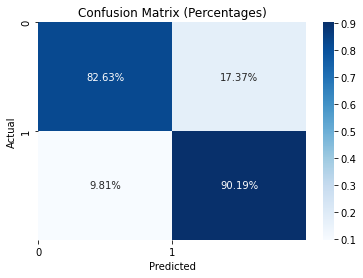

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have y_test and y_pred from the predictions made by your ExtraTreesClassifier model

# Generate the confusion matrix
cm2_rl = confusion_matrix(y_test2, predictions7)

# Calculate the percentages by dividing each element of the confusion matrix by the sum of its corresponding row
cm_percent2_rl = cm2_rl.astype('float') / cm2_rl.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix with percentages
sns.heatmap(cm_percent2_rl, annot=True, fmt=".2%", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.xticks(ticks=[0,1], labels=[0,1])
plt.yticks(ticks=[0,1], labels=[0,1])

# Display the colored confusion matrix with percentages
plt.show()

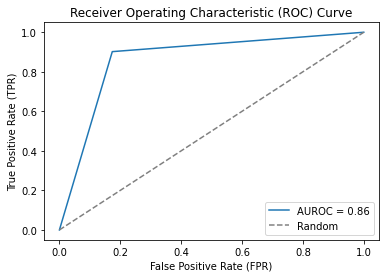

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_rl, tpr_rl, thresholds_rl = roc_curve(y_test2, predictions7)

# Compute the area under the ROC curve (AUROC)
auroc_rl = auc(fpr_rl, tpr_rl)

# Plot the AUROC curve
plt.plot(fpr_rl, tpr_rl, label='AUROC = {:.2f}'.format(auroc_rl))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the AUROC curve
import tikzplotlib

tikzplotlib.save("auroc_Mortality2.tex")

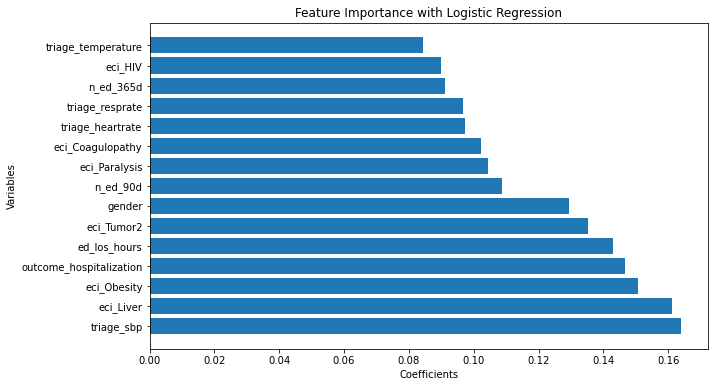

In [63]:
# Accédez à l'estimateur LogisticRegression à partir du pipeline
model = pipeline.named_steps['logisticregression']

# Obtenez les coefficients de la régression logistique à partir du modèle
coefficients7 = model.coef_[0]

# Calculez les valeurs absolues des coefficients
abs_coefficients7 = np.abs(coefficients7)

# Triez les coefficients absolus par ordre décroissant et gardez la correspondance avec les noms de variables
sorted_indices7 = np.argsort(abs_coefficients7)[::-1][:15]
sorted_variables7 = [X_train2.columns[i] for i in sorted_indices7]
sorted_coefficients7 = abs_coefficients7[sorted_indices7]

# Créez un graphique des variables et de leurs coefficients absolus correspondants
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_variables7)), sorted_coefficients7, align='center')
plt.yticks(range(len(sorted_variables7)), sorted_variables7)
plt.xlabel('Coefficients')
plt.ylabel('Variables')
plt.title('Feature Importance with Logistic Regression')
tikzplotlib.save("FI_Mortality1.tex")

In [64]:
from tabulate import tabulate
# Get the trained LogisticRegression model from the pipeline
logistic_regression_model = pipeline.named_steps['logisticregression']

# Get feature importances
feature_importances = np.abs(logistic_regression_model.coef_[0])

# Get feature names
feature_names = pipeline.named_steps['polynomialfeatures'].get_feature_names(X_train2.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Create table data
table_data = []
for name, importance in zip(sorted_feature_names, sorted_feature_importances):
    table_data.append([name, importance])

# Print feature importances as a table
table_headers = ["Feature Name", "Importance"]
print(tabulate(table_data, headers=table_headers, floatfmt=".2f"))

Feature Name                    Importance
----------------------------  ------------
triage_o2sat                          0.16
eci_Renal                             0.16
eci_Coagulopathy                      0.15
ed_los                                0.15
n_icu_365d                            0.14
eci_Lymphoma                          0.14
anchor_age                            0.13
n_ed_30d                              0.11
eci_HTN2                              0.10
eci_Rheumatic                         0.10
triage_temperature                    0.10
triage_heartrate                      0.10
n_ed_90d                              0.09
eci_PUD                               0.09
ed_los_hours                          0.08
eci_Valvular                          0.08
n_icu_30d                             0.08
chiefcom_abdominal_pain               0.08
cci_Renal                             0.08
chiefcom_dizziness                    0.08
anchor_year                           0.07
chiefcom_co

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

degree = 2
n_components = 83

pipeline1 = make_pipeline(
    PolynomialFeatures(degree=degree),
    PCA(n_components=n_components),
    RandomForestClassifier()
)

In [69]:
pipeline1.fit(X_train2, y_train2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('pca', PCA(n_components=83)),
                ('randomforestclassifier', RandomForestClassifier())])

In [70]:
predictions8 = pipeline1.predict(X_test2)

In [71]:
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà effectué les étapes précédentes pour entraîner le modèle et obtenir des prédictions

# Calculer l'exactitude sur les données de test
accuracy8 = accuracy_score(y_test2, predictions8)

# Afficher l'exactitude
print("Exactitude : {:.2f}%".format(accuracy8 * 100))

Exactitude : 86.07%


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

degree = 2
n_components = 83

pipeline2 = make_pipeline(
    PolynomialFeatures(degree),
    PCA(n_components),
    DecisionTreeClassifier()
)

In [73]:
pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('pca', PCA(n_components=83)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [74]:
predictions9 = pipeline2.predict(X_test2)

In [75]:
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà effectué les étapes précédentes pour entraîner le modèle et obtenir des prédictions

# Calculer l'exactitude sur les données de test
accuracy9 = accuracy_score(y_test2, predictions9)

# Afficher l'exactitude
print("Exactitude : {:.2f}%".format(accuracy9 * 100))

Exactitude : 77.08%


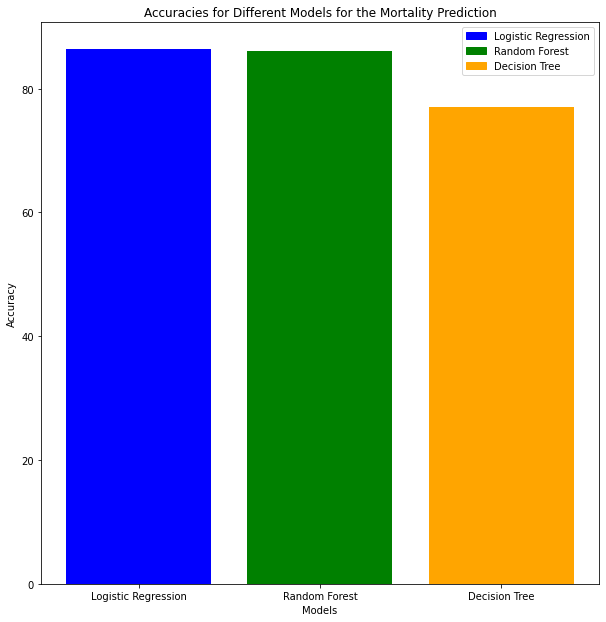

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies for models
accuracies = {
    'Logistic Regression': 86.41,
    'Random Forest': 86.07,
    'Decision Tree': 77.08
}

# Model names
model_names = list(accuracies.keys())

# Accuracy values
accuracy_values = list(accuracies.values())

# Define a color palette
color_palette = ['blue', 'green', 'orange']

# Create an enlarged bar chart
fig, ax = plt.subplots(figsize=(10, 10))

# Plot bars with specified color palette
ax.bar(model_names, accuracy_values, color=color_palette)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracies for Different Models for the Mortality Prediction')

# Create a legend for the color scale
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_palette]
ax.legend(legend_elements, model_names, loc='upper right')

plt.subplots_adjust(bottom=0.1)  # Increase the bottom space between the histograms and the color scale

# Displaying the histogram
tikzplotlib.save("HistogramComparisonOM_models.tex")

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

degree = 2
n_components = 96

pipeline3 = make_pipeline(
    PCA(n_components),
    LogisticRegression()
)

In [140]:
pipeline3.fit(X_train2, y_train2)

Pipeline(steps=[('pca', PCA(n_components=96)),
                ('logisticregression', LogisticRegression())])

In [159]:
predictions10 = pipeline3.predict(X_test2)

In [160]:
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà effectué les étapes précédentes pour entraîner le modèle et obtenir des prédictions

# Calculer l'exactitude sur les données de test
accuracy10 = accuracy_score(y_test2, predictions10)

# Afficher l'exactitude
print("Exactitude : {:.2f}%".format(accuracy10 * 100))

Exactitude : 50.61%


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

degree = 2
n_components = 98

pipeline4 = make_pipeline(
    PolynomialFeatures(degree),
     LogisticRegression()
)

In [162]:
pipeline4.fit(X_train2, y_train2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

In [163]:
predictions11 = pipeline4.predict(X_test2)

In [164]:
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà effectué les étapes précédentes pour entraîner le modèle et obtenir des prédictions

# Calculer l'exactitude sur les données de test
accuracy11 = accuracy_score(y_test2, predictions11)

# Afficher l'exactitude
print("Exactitude : {:.2f}%".format(accuracy11 * 100))

Exactitude : 51.06%


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

degree = 2
n_components = 98
pipeline5 = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    LogisticRegression()
)

In [177]:
pipeline5.fit(X_train2, y_train2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [179]:
predictions12 = pipeline5.predict(X_test2)

In [180]:
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà effectué les étapes précédentes pour entraîner le modèle et obtenir des prédictions

# Calculer l'exactitude sur les données de test
accuracy12 = accuracy_score(y_test2, predictions12)

# Afficher l'exactitude
print("Exactitude : {:.2f}%".format(accuracy12 * 100))

Exactitude : 83.89%


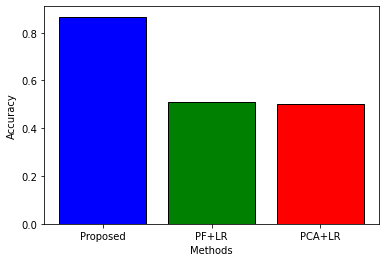

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

# List of method names
methods = ['Proposed', 'PF+LR', 'PCA+LR']

# List of accuracies for different methods
accuracies = [0.867, 0.51, 0.5]

# Creating an array of indices for x-axis
x_indices = np.arange(len(methods))

# Custom color for each bar
colors = ['blue', 'green', 'red']

# Plotting the histogram with custom colors
plt.bar(x_indices, accuracies, edgecolor='black', color=colors)

# Setting x-axis tick labels to method names
plt.xticks(x_indices, methods)

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Accuracy')

# Saving the histogram as a TikZ file
tikzplotlib.save("HistogramComparison_OM1.tex")

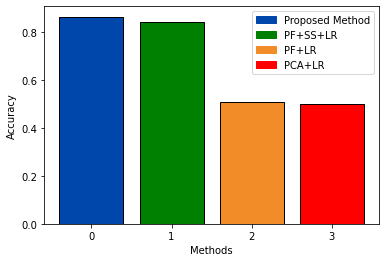

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# List of method names
methods = ['Proposed Method', 'PF+SS+LR', 'PF+LR', 'PCA+LR']

# List of accuracies for different methods
accuracies = [0.864, 0.84, 0.51, 0.5]

# Creating an array of indices for x-axis
x_indices = np.arange(len(methods))

# Custom color for each bar
colors = ['#0047AB', 'green', '#F28C28', 'red']

# Plotting the histogram with custom colors
plt.bar(x_indices, accuracies, align='center', edgecolor='black', color=colors)

# Setting x-axis tick labels to method names
plt.xticks(x_indices)

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Accuracy')

# Creating color patches for the legend
patches = [mpatches.Patch(color=colors[i], label=methods[i]) for i in range(len(methods))]

# Displaying the legend
plt.legend(handles=patches, loc='upper right')

# Displaying the histogram
tikzplotlib.save("HistogramComparisonOM3_1.tex")

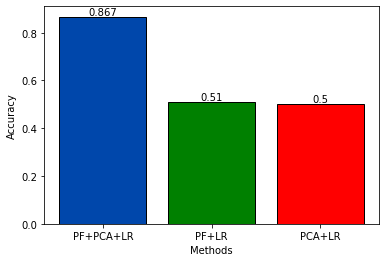

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# List of method names
methods = ['PF+PCA+LR', 'PF+LR', 'PCA+LR']

# List of accuracies for different methods
accuracies = [0.867, 0.51, 0.5]

# Creating an array of indices for x-axis
x_indices = np.arange(len(methods))

# Custom color for each bar
colors = ['#0047AB', 'green', 'red']

# Plotting the histogram with custom colors
plt.bar(x_indices, accuracies, align='center', edgecolor='black', color=colors)

# Adding labels for each accuracy with method names
for i in range(len(methods)):
    plt.text(x_indices[i], accuracies[i], str(accuracies[i]), ha='center', va='bottom')

# Setting x-axis tick labels to method names
plt.xticks(x_indices, methods)

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Accuracy')

# Displaying the histogram
tikzplotlib.save("HistogramComparisonOM.tex")